# Part 3: Clustering

Clustering is an unsuperivsed ML method used to group data points based on their features alone, and no observed grouping labels as in supervised classification. Thus most clustering alorithms seeks to group points by their distance in a high dimensional space generated by provided features.

Below is a plot showing the results of the clustering algorithms in Scikit-Learn for several different toy datasets.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png'/>

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs, make_circles, make_moons

plt.style.use("ggplot")

## 1) Spotify Data

[Spotify has a really cool api](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features) that provides access to a variety of numerical features encoding musical traits such as energy, danceability, and loudness. Below is the data dictionary explaining what each feature means.

### Data Dictionary

**acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.


**danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**duration_ms:** The duration of the track in milliseconds.

**energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**id:** The Spotify ID for the track.

**instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness:** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

**valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Our job is to cluster songs based on these data.

In [4]:
df = pd.read_csv("../data/spotify_features.csv")
df.head()

,id,song,album,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,album_id,date
0,2K0DYi53yjGprGETtCDSvs,Point At You - Tribute to Justin Moore,Point At You & Four More Hits (EP),Justin Moore,0.03880,0.695,184216.0,0.758,0.000000,7.0,0.224,-5.054,1.0,0.0279,116.057,4.0,0.633,002bmdBNTU9ddQBRaNoc28,2013-04-26
1,5EU1FBxLv9dfkwSwXZFtnm,The Sounds of Silence,Fresh Flavor,Jane Morgan,0.79700,0.505,159880.0,0.251,0.000000,9.0,0.305,-13.256,1.0,0.0515,133.921,4.0,0.465,0053zlUdN0cONMTI7WjOyK,1966
2,2Ry8FJZeCgXJMHeHdeKVez,Fallen Through,Noise From The Basement,Skye Sweetnam,0.00123,0.443,223173.0,0.866,0.000015,7.0,0.296,-4.981,0.0,0.0412,183.732,3.0,0.345,006GInRhIodRFgCNy07LPQ,2004-01-01
3,55xNjVrGJxgqcEFqCyejTM,letter 2 my momma,I Am > I Was,21 Savage,0.05310,0.864,194810.0,0.608,0.000012,1.0,0.078,-10.567,0.0,0.2750,80.225,4.0,0.963,007DWn799UWvfY1wwZeENR,2018-12-21
4,27OTkAv05jLMSAfaRgcMtI,Over And Over,Kidz Bop 8,Kidz Bop Kids,0.07630,0.670,253733.0,0.650,0.000000,2.0,0.201,-11.265,1.0,0.0497,169.725,4.0,0.319,008syfDmn2NntooEtXGl5A,2005-08-02


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25777 entries, 0 to 25776
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                25777 non-null  object 
 1   song              25777 non-null  object 
 2   album             25777 non-null  object 
 3   artist            25775 non-null  object 
 4   acousticness      25777 non-null  float64
 5   danceability      25777 non-null  float64
 6   duration_ms       25777 non-null  float64
 7   energy            25777 non-null  float64
 8   instrumentalness  25777 non-null  float64
 9   key               25777 non-null  float64
 10  liveness          25777 non-null  float64
 11  loudness          25777 non-null  float64
 12  mode              25777 non-null  float64
 13  speechiness       25777 non-null  float64
 14  tempo             25777 non-null  float64
 15  time_signature    25777 non-null  float64
 16  valence           25777 non-null  float6

## 1) K-means clustering  

The first algorithm we cover is k-means clustering using `scikit-learn`. The scikit-learn documentation for clustering is found [here](http://scikit-learn.org/stable/modules/clustering.html).


![](https://miro.medium.com/max/1200/1*rw8IUza1dbffBhiA4i0GNQ.png)

KMeans works by divying data into K number of groups (K is determined by you the data scientist) by assigning data to the centriods its closests to.

KMeans works to find the centriods that minimize the "inertia" or the sum of the squared distances of every point and its centriods as shown in the following formula:

$$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_j - \mu_i||^2)$$




Distance is determined using the euclidean distance formula:

$$d = \sqrt {\left( {x_1 - x_2 } \right)^2 + \left( {y_1 - y_2 } \right)^2 }$$

The algorithm first randomly comes up with the positions of the K centriods and then assigns labels to data based on their nearest centriods.

After this first iteration the centriods are then recomputed by taking the average of all the points in each cluster. This process repeats until the model reaches a point of convergance or some other stopping criteria.

The following gif demonstrates the iterative process of KMeans

<img src=https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif style="width: 500px;"/>

### Visualizing KMeans in a 2D space
Before we apply Kmeans to the spotify data, let's visualize how it works on a 2d matrix

In [6]:
X, _ = make_blobs(n_samples=200, n_features=2, random_state=4)
X[:5]

array([[ 8.35760513,  0.99907772],
       [ 9.54991027,  0.57020007],
       [ 9.17044091,  4.34579642],
       [ 1.75251191, -2.8914065 ],
       [ 3.91205403, -5.38190511]])

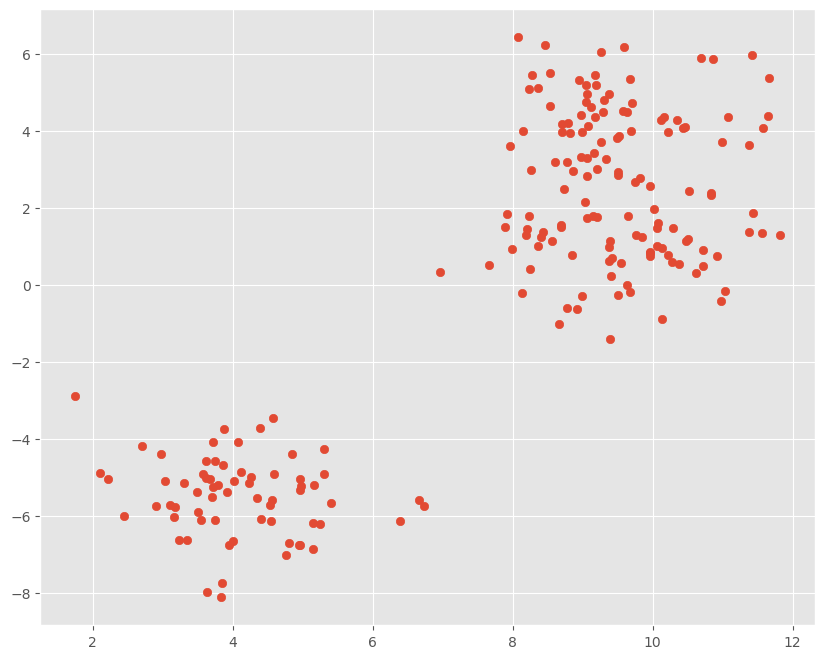

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(x = X[:, 0], y = X[:, 1]);

Intialize the algoritm with k = 2

In [8]:
km = KMeans(n_clusters=2, random_state=1)

Fit on the data

In [9]:
km.fit(X)

/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=1)

Grab the labels and centroids. (FYI, `labels_` has an _ on the end because it's an attribute created after a certain command, there is no `labels_` pre modeling fitting).

In [10]:
labels = km.labels_
labels

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1], dtype=int32)

In [11]:
# We can also grab labels predicting X
# labels = km.predict(X) 

These are the centriods/centers of the clusters. They are the average values of the features in each cluster.

In [25]:
centriods = km.cluster_centers_
centriods

array([[-0.41469106,  0.85287553, -0.48738716, -0.40307402, -0.77538141,
        -0.26528656],
       [-0.55383166,  0.78989807,  0.60867744, -0.29799678,  0.60388769,
        -0.23529119],
       [ 1.49509222,  0.25525953, -0.51379263,  1.80628552, -1.30715889,
         6.10129193],
       [ 1.49353596, -1.0869114 , -1.26523006, -0.26065403, -0.63348631,
        -0.39738067],
       [-0.12290759, -0.45870128,  0.42883144,  2.72686028,  0.14807536,
         0.01573765],
       [-0.82179467, -0.71721112,  1.13276022, -0.02679412,  0.90938951,
        -0.03525633],
       [-0.41204647,  0.91606529,  0.34118916, -0.0374082 ,  0.44724256,
         1.94098622],
       [ 1.69999594, -0.75431802, -1.92287562, -0.25709462, -2.36476629,
        -0.31392661],
       [-0.38695133, -0.69587259, -0.14895254, -0.30793645, -0.02664363,
        -0.36297861],
       [ 1.09312023,  0.41735322, -0.59696784, -0.3212511 , -0.19781002,
        -0.33123339]])

Let's plot the data colored by the cluster labels along with the centriods.

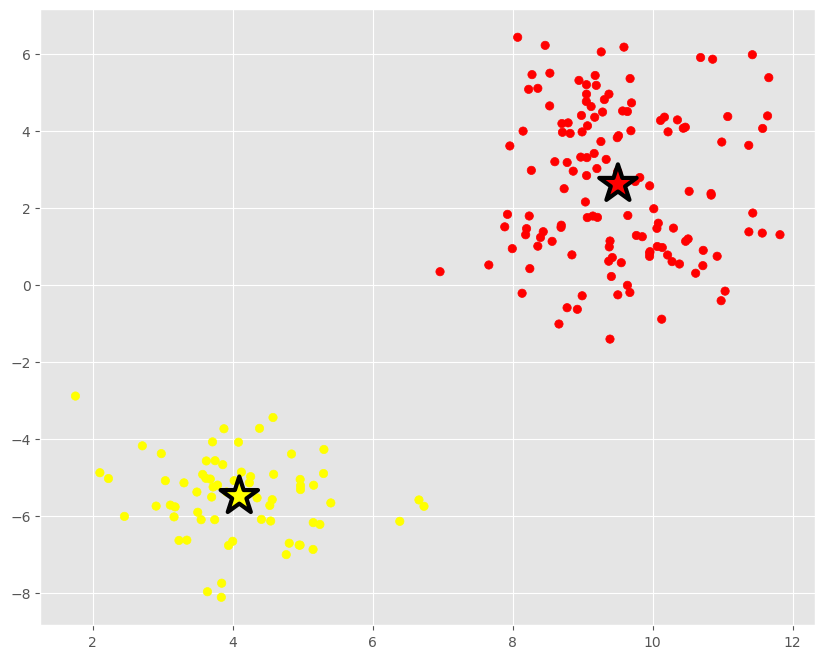

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(x = X[:, 0], y = X[:, 1], c=labels, cmap="autumn")
plt.scatter(x = centriods[:, 0], y = centriods[:, 1], 
            s=800, marker="*", c=list(set(labels)), edgecolors=["black", "black"], cmap="autumn", linewidths=3);

What happens we try a different K value

/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


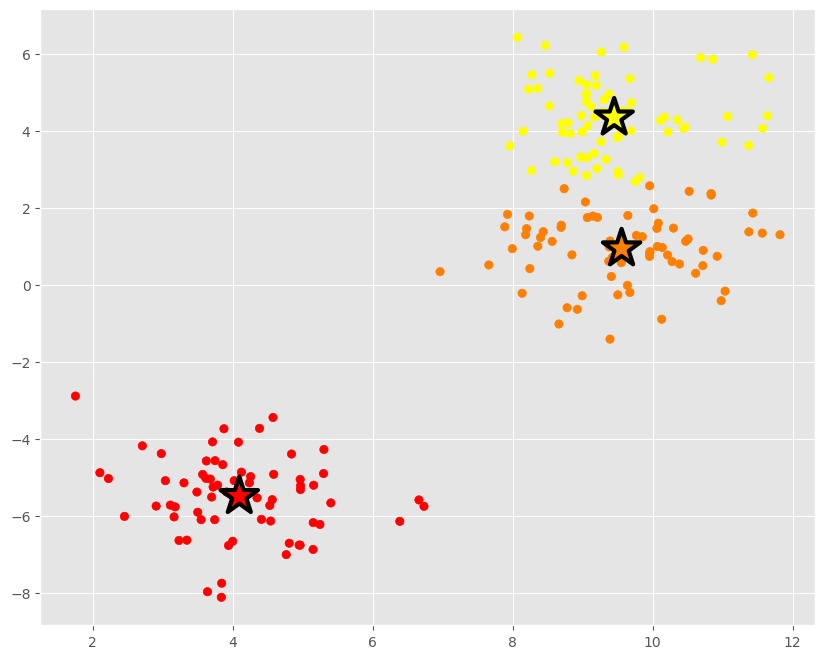

In [14]:
km = KMeans(n_clusters=3)
km.fit(X)
labels = km.labels_
centriods = km.cluster_centers_
plt.figure(figsize=(10, 8))
plt.scatter(x = X[:, 0], y = X[:, 1], c=labels, cmap="autumn")
plt.scatter(x = centriods[:, 0], y = centriods[:, 1], 
            s=800, marker="*", c=list(set(labels)), 
            edgecolors=["black","black", "black"], cmap="autumn", linewidths=3);

## KMeans and Spotify

Select the song attributes columns for clustering

In [15]:
df.head()

,id,song,album,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,album_id,date
0,2K0DYi53yjGprGETtCDSvs,Point At You - Tribute to Justin Moore,Point At You & Four More Hits (EP),Justin Moore,0.03880,0.695,184216.0,0.758,0.000000,7.0,0.224,-5.054,1.0,0.0279,116.057,4.0,0.633,002bmdBNTU9ddQBRaNoc28,2013-04-26
1,5EU1FBxLv9dfkwSwXZFtnm,The Sounds of Silence,Fresh Flavor,Jane Morgan,0.79700,0.505,159880.0,0.251,0.000000,9.0,0.305,-13.256,1.0,0.0515,133.921,4.0,0.465,0053zlUdN0cONMTI7WjOyK,1966
2,2Ry8FJZeCgXJMHeHdeKVez,Fallen Through,Noise From The Basement,Skye Sweetnam,0.00123,0.443,223173.0,0.866,0.000015,7.0,0.296,-4.981,0.0,0.0412,183.732,3.0,0.345,006GInRhIodRFgCNy07LPQ,2004-01-01
3,55xNjVrGJxgqcEFqCyejTM,letter 2 my momma,I Am > I Was,21 Savage,0.05310,0.864,194810.0,0.608,0.000012,1.0,0.078,-10.567,0.0,0.2750,80.225,4.0,0.963,007DWn799UWvfY1wwZeENR,2018-12-21
4,27OTkAv05jLMSAfaRgcMtI,Over And Over,Kidz Bop 8,Kidz Bop Kids,0.07630,0.670,253733.0,0.650,0.000000,2.0,0.201,-11.265,1.0,0.0497,169.725,4.0,0.319,008syfDmn2NntooEtXGl5A,2005-08-02


Select just the pure musical personality traits, we do this for simplicity and efficiency.

In [16]:
cols = ["acousticness", "danceability", "energy", "liveness", "loudness", "speechiness"]
X = df[cols]
X.head()

,acousticness,danceability,energy,liveness,loudness,speechiness
0,0.03880,0.695,0.758,0.224,-5.054,0.0279
1,0.79700,0.505,0.251,0.305,-13.256,0.0515
2,0.00123,0.443,0.866,0.296,-4.981,0.0412
3,0.05310,0.864,0.608,0.078,-10.567,0.2750
4,0.07630,0.670,0.650,0.201,-11.265,0.0497


### Standardization

Before we cluster the data, we first need to standardize the data. Because the euclidean distance function equally considers or weights each feature, larger features bias the results.

We are going to transform the data into their Z-scores using a standard scaler.

![](https://www.simplypsychology.org/Z-score-formula.jpg)

Intialize scaler object

In [17]:
scaler = StandardScaler()

Fit on the data.

In [18]:
scaler.fit(X)

StandardScaler()

`scaler` has learned from the data but it hasn't produced any new data. That's why we need to use `.transform()`

In [19]:
#Create the transformed data using scaler
Xs = scaler.transform(X)

We can also do both operations in one line.

In [20]:
Xs = scaler.fit_transform(X)

Now we can cluster the spotify data. Let's try five clusters.

In [21]:
km = KMeans(n_clusters=5, random_state=1)
km.fit(Xs)

/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=1)

Grab labels, tally the frequency

In [22]:
labels = km.labels_
pd.value_counts(labels)

/var/folders/s5/qhndbs491y513gh0hrlzfx5c0000gn/T/ipykernel_44485/2330899498.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(labels)


0    9094
1    7927
2    6281
3    2030
4     445
Name: count, dtype: int64

### Model Evaluation

Evaluating cluster models isn't as precise as evaluating supervised learning models since we don't know the true labels of the data.

However use we can use techniques such as the elbow method and silhouette scores to try to deterine the optimal k-value.

**The Elbow Method**
![](https://www.researchgate.net/publication/339823520/figure/fig3/AS:867521741733888@1583844709013/The-elbow-method-of-k-means.png)

**Silhouette Score**

![](https://uploads-ssl.webflow.com/5f5148a709e16c7d368ea080/5f7dea907b8e8c7769e769c8_5f7c9650bc3b1ed0ad2247eb_silhouette_formula.jpg)

The `intertia_` attribute tells us the model's error — the sum of the squared distances between every point and its centriod.

We make an elbow plot by plotting an array of k-values versus each k-value's model's intertia score.

In [23]:
km.inertia_

69441.29178057704

/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/leahl

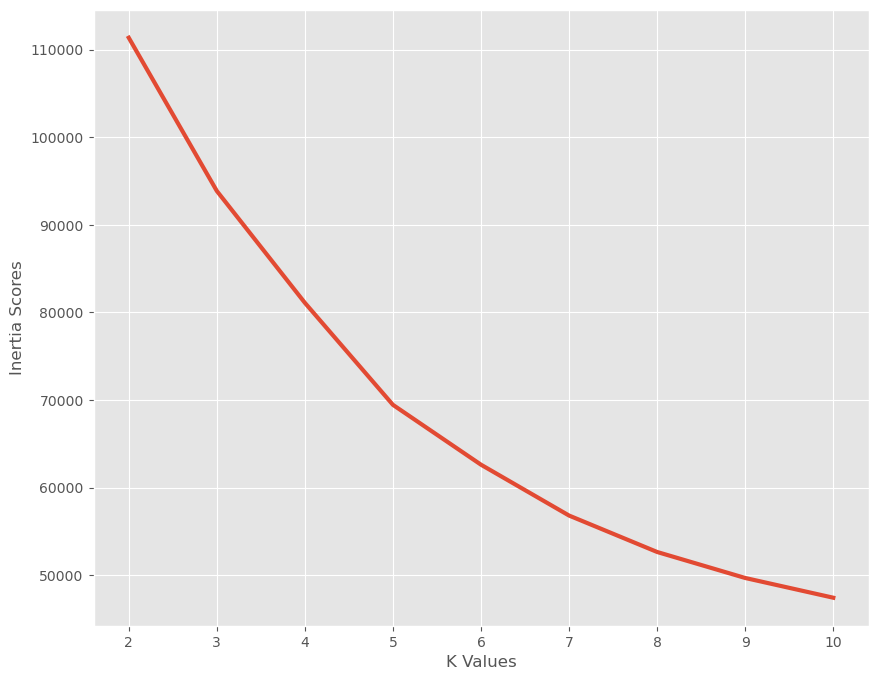

In [24]:
#Intialize list to collect intertia scores and array of k-values
i_scores = []
kvalues = np.arange(2, 11)

#iterate over kvalues
for k in kvalues:
    #intialize model with k and fit it on Xs
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Xs)
    #append inertia score to i_scores
    i_scores.append(km.inertia_)
    
#plot kvalues versus i_scores
plt.figure(figsize=(10, 8))
plt.plot(kvalues, i_scores, linewidth = 3)
plt.xticks(ticks=kvalues, labels=kvalues)
plt.xlabel("K Values")
plt.ylabel("Inertia Scores");

**Where is the elbow?**

Let's repeat a similar process for silhouette scores

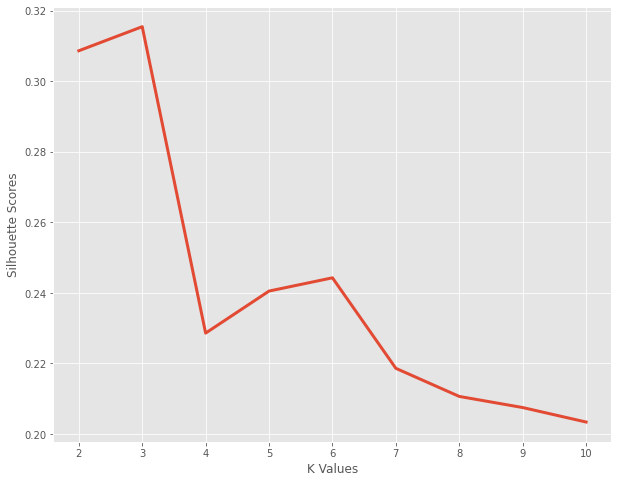

In [27]:
#Intialize list to collect silhouette scores
s_scores = []

#iterate over kvalues
for k in kvalues:
    #intialize model with k and fit it on Xs
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(Xs)
    labels = km.labels_
    #derive silhouette score by passing in data and labels
    ss = silhouette_score(Xs, labels=labels)
    #append silhouette score to s_scores
    s_scores.append(ss)
    
#plot kvalues versus s_scores
plt.figure(figsize=(10, 8))
plt.plot(kvalues, s_scores, linewidth = 3)
plt.xticks(ticks=kvalues, labels=kvalues)
plt.xlabel("K Values")
plt.ylabel("Silhouette Scores");

Which k value produces the best silhouette score

In [28]:
#Find the maxiumum of s_scores and use that number to find its index value in s_scores
k_index = s_scores.index(max(s_scores))
#Index kvalues with k_index
best_k = kvalues[k_index]
best_k

3

Train a model with `best_k`

In [29]:
km = KMeans(n_clusters=best_k, random_state=1)
km.fit(Xs)
labels = km.labels_

Distribution of labels

In [30]:
pd.value_counts(labels)

1    15848
0     7392
2     2537
dtype: int64

### Exploratory Data Analysis 

Now that we know how k types of songs there are, we need to add some identity to the labels. Sklearn doesn't tell us what each label means, the labels of 0, 1, and 2 hold no information about the types of music each label represents.

Therefore it's on us to use some EDA techniques to derive meaning from these categorizations.

Group the original dataset by the labels and calculate the means. These are the centriods

In [31]:
X.loc[:, "labels"] = labels

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [32]:
X.groupby('labels').mean()

,acousticness,danceability,energy,liveness,loudness,speechiness
labels,,,,,,
0,0.642098,0.480094,0.333909,0.159341,-13.393374,0.047746
1,0.123028,0.579470,0.737367,0.173403,-7.079745,0.083710
2,0.311820,0.493973,0.700041,0.709084,-9.094588,0.220318


Use `describe()`

In [35]:
X.groupby("labels").describe().T

labels                        0             1            2
acousticness count  7392.000000  15848.000000  2537.000000
             mean      0.642098      0.123028     0.311820
             std       0.252232      0.157862     0.308066
             min       0.000000      0.000000     0.000001
             25%       0.476000      0.006520     0.026700
             50%       0.689000      0.053000     0.202000
             75%       0.852000      0.186000     0.570000
             max       0.996000      0.898000     0.991000
danceability count  7392.000000  15848.000000  2537.000000
             mean      0.480094      0.579470     0.493973
             std       0.164621      0.158343     0.159299
             min       0.000000      0.000000     0.000000
             25%       0.365750      0.472000     0.379000
             50%       0.489000      0.584000     0.495000
             75%       0.597000      0.694000     0.606000
             max       0.948000      0.980000     0.935000
energy       count  7392.000000  15848.000000  2537.000000
             mean      0.333909      0.737367     0.700041
             std       0.148739      0.156392     0.211158
             min       0.000000      0.000556     0.054300
             25%       0.228000      0.620000     0.552000
             50%       0.337000      0.747000     0.732000
             75%       0.439000      0.867000     0.879000
             max       0.975000      1.000000     0.999000
liveness     count  7392.000000  15848.000000  2537.000000
             mean      0.159341      0.173403     0.709084
             std       0.112687      0.109579     0.206054
             min       0.000000      0.000000     0.030000
             25%       0.096000      0.091200     0.581000
             50%       0.117000      0.133000     0.708000
             75%       0.177000      0.244000     0.902000
             max       0.968000      0.616000     1.000000
loudness     count  7392.000000  15848.000000  2537.000000
             mean    -13.393374     -7.079745    -9.094588
             std       4.408778      2.856433     4.224556
             min     -60.000000    -20.714000   -29.369000
             25%     -15.613000     -8.808250   -11.634000
             50%     -12.856000     -6.600000    -8.318000
             75%     -10.365750     -4.975500    -5.944000
             max      -3.457000      1.275000     0.403000
speechiness  count  7392.000000  15848.000000  2537.000000
             mean      0.047746      0.083710     0.220318
             std       0.056014      0.084308     0.264968
             min       0.000000      0.000000     0.000000
             25%       0.030500      0.034600     0.045700
             50%       0.035200      0.048600     0.086100
             75%       0.044000      0.088700     0.313000
             max       0.954000      0.622000     0.964000

**What does this tell us about the labels**

Visualize the distributions of data by cluster.

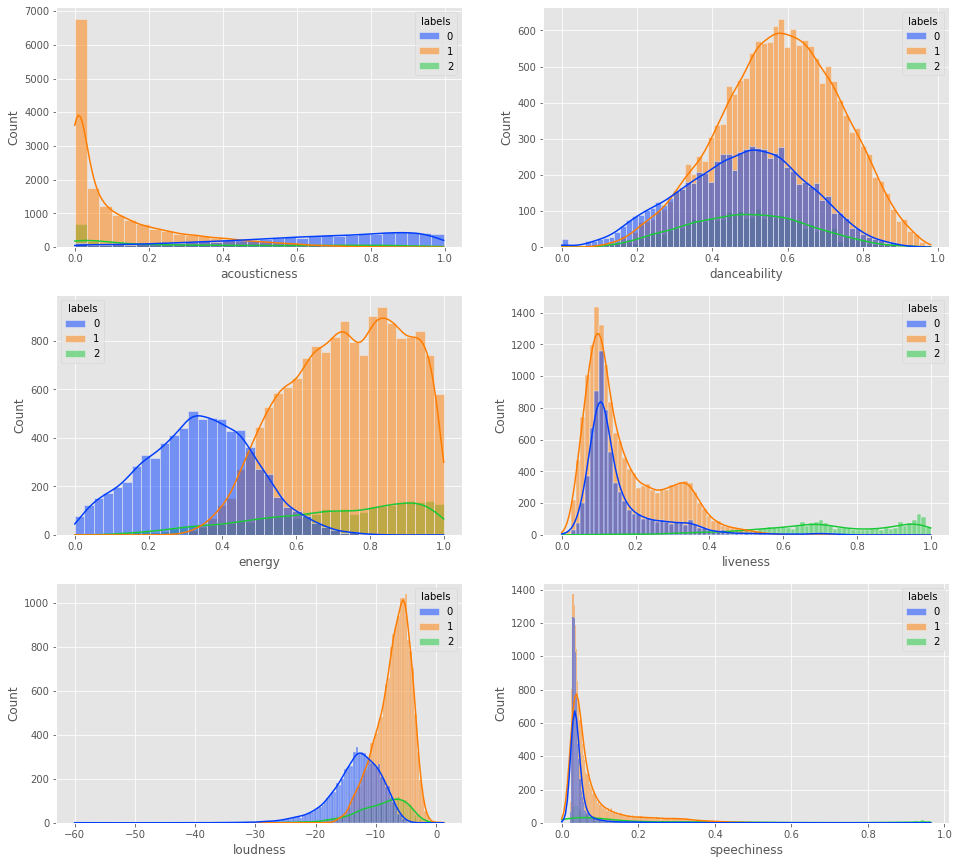

In [49]:
f, axes = plt.subplots(3, 2, figsize=(16, 15))

palette = "bright"
sb.histplot(data = X, x = 'acousticness', hue="labels", kde = True , palette = palette, ax=axes[0,0])
sb.histplot(data = X, x = 'danceability', hue="labels", kde = True , palette = palette, ax=axes[0,1])
sb.histplot(data = X, x = 'energy', hue="labels", kde = True , palette = palette, ax=axes[1,0])
sb.histplot(data = X, x = 'liveness', hue="labels", kde = True , palette = palette, ax=axes[1,1])
sb.histplot(data = X, x = 'loudness', hue="labels", kde = True , palette = palette, ax=axes[2, 0])
sb.histplot(data = X, x = 'speechiness', hue="labels", kde = True , palette = palette, ax=axes[2, 1]);

**What insights can we glean from this visualization?**


**What are some other ways we can add meaning to the labels?**

### The limits of KMeans

The biggest flaw of KMeans is its inability to coherently cluster complicated and irregular patterns of data.

Let's look at some examples.

In [26]:
#Generate the circles moons datasets
circles, _ = make_circles(n_samples=200, factor=.3, noise = .04, random_state=1)
moons, _ = make_moons(n_samples=200, noise = .07, random_state=1)

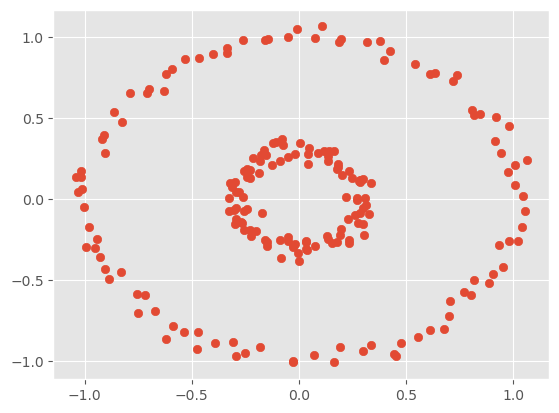

In [27]:
#Visualize circles dataset
plt.scatter(*circles.T);

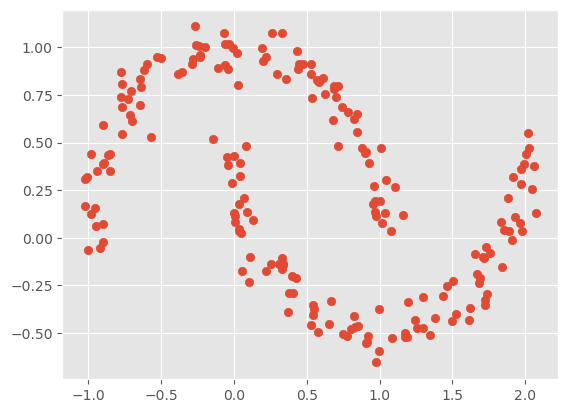

In [28]:
#Visualize moons dataset
plt.scatter(*moons.T);

**How would you go about clustering these two datasets?**

**How do you think KMeans will cluster them?**

Cluster the two datasets and then visual the results below

/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


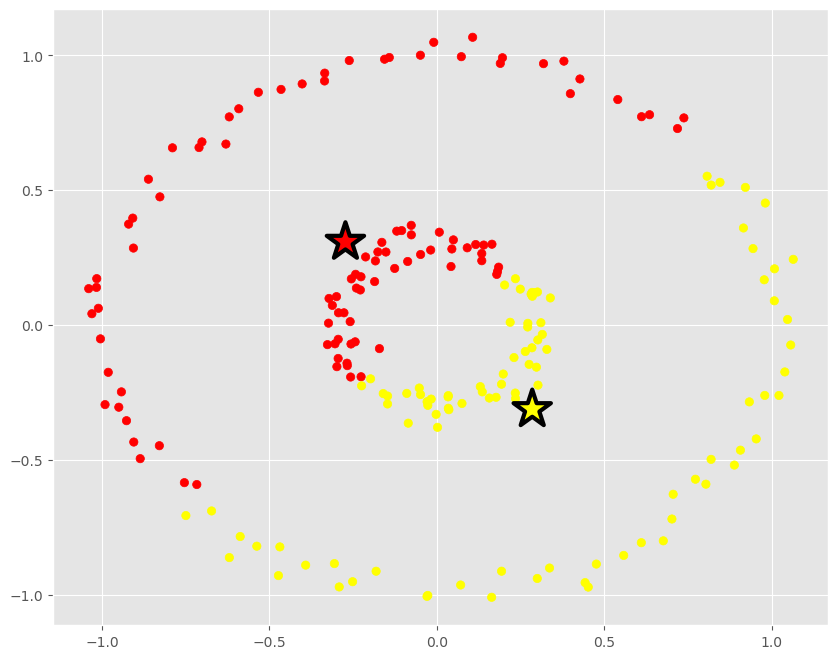

In [29]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(circles)
labels = km.labels_
centriods = km.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(x = circles[:, 0], y = circles[:, 1], c=labels, cmap="autumn")
plt.scatter(x = centriods[:, 0], y = centriods[:, 1], 
            s=800, marker="*", c=list(set(labels)), edgecolors=["black", "black"], cmap="autumn", linewidths=3);

/Users/leahlee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


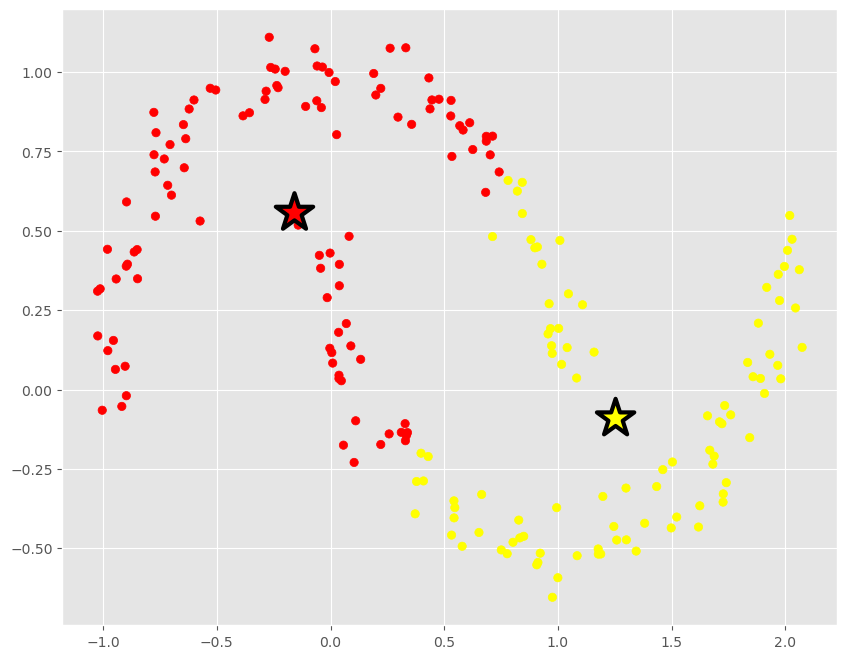

In [30]:
km = KMeans(n_clusters=2, random_state=1)
km.fit(moons)
labels = km.labels_
centriods = km.cluster_centers_

plt.figure(figsize=(10, 8))
plt.scatter(x = moons[:, 0], y = moons[:, 1], c=labels, cmap="autumn")
plt.scatter(x = centriods[:, 0], y = centriods[:, 1], 
            s=800, marker="*", c=list(set(labels)), edgecolors=["black", "black"], cmap="autumn", linewidths=3);

**What do you think of the results? How would you cluser the data by hand if they were drawn on a board?**

## Hierarchical Clustering

Now we'll show an example of hierarchical clustering called agglomerative clustering. The documentation is [here](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) in case you want to know more about the parameters.

Agglomerative clustering works by first assigning every data point it's own cluster. Then using a defined distance metric (euclidean, cosine, etc...) it measures the distance for every combination of subclusters at each iterative step and continues to merge until all points are in the same cluster.

### Dendrogram
![](https://miro.medium.com/max/740/1*VvOVxdBb74IOxxF2RmthCQ.png)

Hierarchical clustering is best explained throught the graphic above called a dendrogram

All the datapoints are laid out on the x-axis and the y-axis represents the distance threshold. The distance threshold has a negative correlation with the number of clusters.

The number of clusters in the figure above is four, which you can tell by the number of lines the red dotted-line crosses. The datapoints of f, g, and h are grouped in the same cluster because all of that cluster's intra-distances are less than the chosen distance threshold.

### Linkage 

Linkage is hierarchical clustering's method of determining distances between clusters for when it either splits up or combines clusters depending on the movement of the distance threshold.

![](https://editor.analyticsvidhya.com/uploads/40351linkages.PNG)

An interesting and useful way to think about hierarchical clustering is to approach the same way you would a biological taxonomy.

![](https://i.pinimg.com/originals/da/70/81/da708128987034e6c0b3b8a0ccac3c05.jpg)

The looser the taxonomical criteria the larger and more diverse collection of animals you get. For example: housecats, bobcats, lynx, tigers, lions, and leopards are apart of the felidae family despite possessing some obvious differences among them.

### Clustering with Agglomerative Clustering

Let's see if Agglomerative Clustering can do a better job with the moons and circles datasets than KMeans while demonstrating the impact of different linkage inputs.

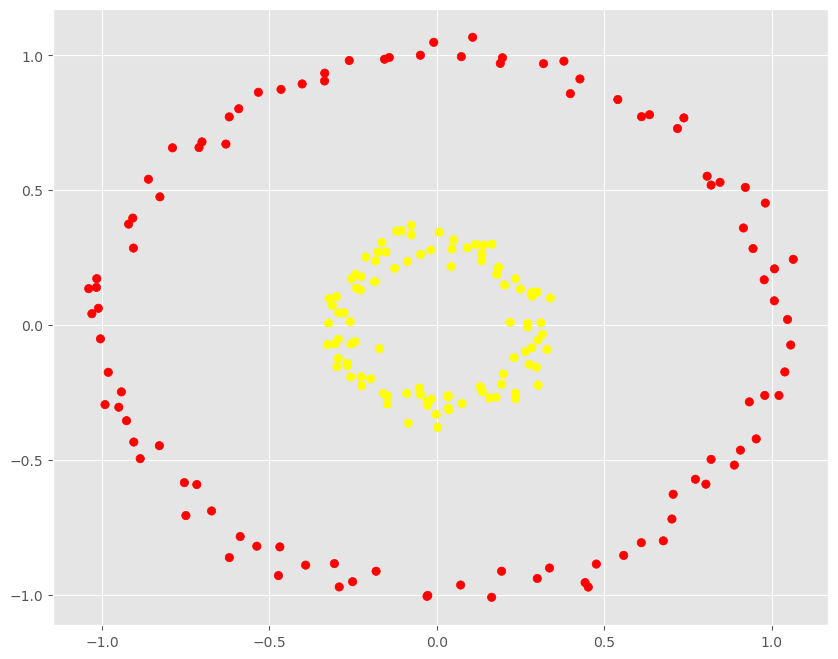

In [33]:
#Intialize model with linkage = single
agg = AgglomerativeClustering(n_clusters=2, linkage="single")
#Fit on circles dataset
agg.fit(circles)
labels = agg.labels_

plt.figure(figsize=(10, 8))
plt.scatter(x = circles[:, 0], y = circles[:, 1], c=labels, cmap="autumn")

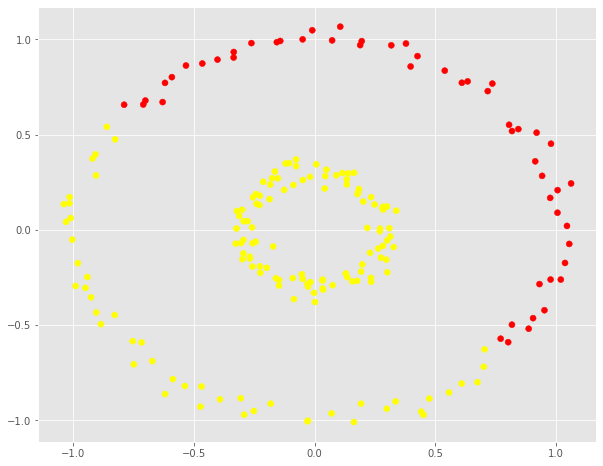

In [57]:
#Intialize model with linkage = complete
agg = AgglomerativeClustering(n_clusters=2, linkage="complete")
#Fit on circles dataset
agg.fit(circles)
labels = agg.labels_

plt.figure(figsize=(10, 8))
plt.scatter(x = circles[:, 0], y = circles[:, 1], c=labels, cmap="autumn")

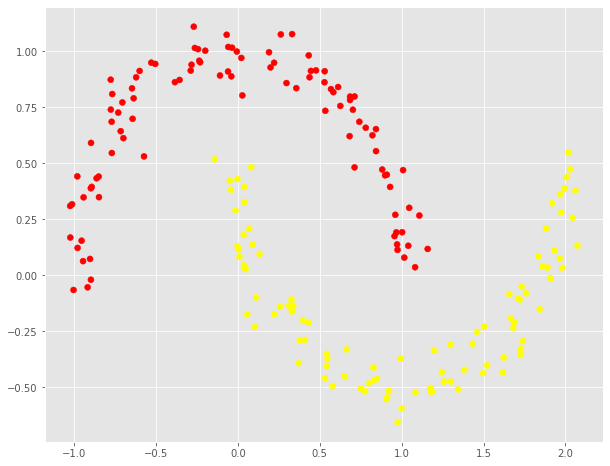

In [58]:
#Intialize model with linkage = single
agg = AgglomerativeClustering(n_clusters=2, linkage="single")
#Fit on circles dataset
agg.fit(moons)
labels = agg.labels_

plt.figure(figsize=(10, 8))
plt.scatter(x = moons[:, 0], y = moons[:, 1], c=labels, cmap="autumn")

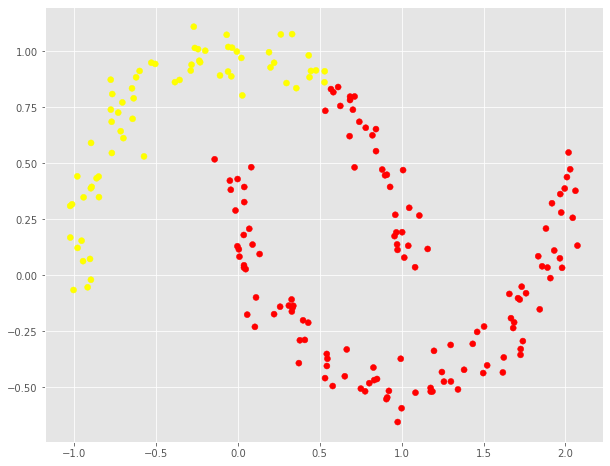

In [59]:
#Intialize model with linkage = complete
agg = AgglomerativeClustering(n_clusters=2, linkage="complete")
#Fit on circles dataset
agg.fit(moons)
labels = agg.labels_

plt.figure(figsize=(10, 8))
plt.scatter(x = moons[:, 0], y = moons[:, 1], c=labels, cmap="autumn")

**Linkage is a very important parameter**

Now let's try it out on the Spotify data to see if it offers an improvement over KMeans.

Like we did with KMean, we're going to iterate over a range of k values and then determine the best k using silhouette scores.

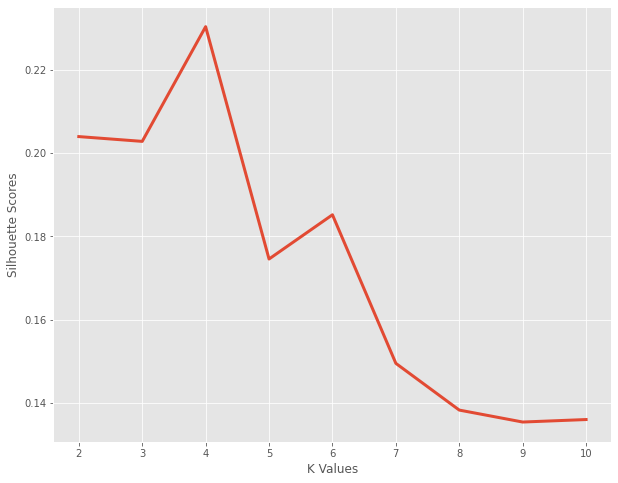

In [60]:
#Intialize list to collect silhouette scores
s_scores = []

#iterate over kvalues
for k in kvalues:
    #intialize model with k and fit it on Xs
    agg = AgglomerativeClustering(n_clusters=k, affinity="euclidean", linkage="ward", memory="..")
    agg.fit(Xs)
    labels = agg.labels_
    #derive silhouette score by passing in data and labels
    ss = silhouette_score(Xs, labels=labels)
    #append silhouette score to s_scores
    s_scores.append(ss)
    
#plot kvalues versus s_scores
plt.figure(figsize=(10, 8))
plt.plot(kvalues, s_scores, linewidth = 3)
plt.xticks(ticks=kvalues, labels=kvalues)
plt.xlabel("K Values")
plt.ylabel("Silhouette Scores");